# 単一量子ビットゲート

前のセクションでは、量子ビットが存在する可能性のあるすべての状態を調べました。量子ビットは2次元ベクトルで表すことができ、その状態は次の形式に制限されていることがわかりました。

In the previous section we looked at all the possible states a qubit could be in. We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

$\theta$および$\phi$は実数です。このセクションでは、これらの状態間で量子ビットを変更する操作である _ゲート_ について説明します。ゲートの数とゲート間の類似性のため、この章は単調になる危険性があります。 これを回避するために、章全体の適切な場所に重要な考え方をを紹介するいくつかの余談を含めました。

Where $\theta$ and $\phi$ are real numbers. In this section we will cover _gates,_ the operations that change a qubit between these states. Due to the number of gates and the similarities between them, this chapter is at risk of becoming a list. To counter this, we have included a few digressions to introduce important ideas at appropriate places throughout the chapter. 

## 目次    

1. [パウリゲート](#pauli)    
    1.1 [Xゲート](#xgate)    
    1.2 [Y、Zゲート](#ynzgatez)    
2. [余談: X、Y、Z基底](#xyzbases)    
3. [アダマールゲート](#hgate)    
4. [余談: 異なる基底での測定](#measuring)    
5. [R<sub>ϕ</sub>ゲート](#rzgate)    
6. [I、S、Tゲート](#istgates)    
    6.1 [Iゲート](#igate)    
    6.2 [Sゲート](#sgate)    
    6.3 [Tゲート](#tgate)    
7. [The General U<sub>3</sub>-gate](#generalU3)    

_原子で計算をおこなう_ では、いくつかのゲートに出会い、それらを使用して古典的な計算を実行しました。 量子回路の重要な特徴は、量子ビットの初期化と測定の間に、操作が *_いつも_* 可逆であることです。 その結果、量子回路で使用できるすべてのゲートも可逆です。 これらの可逆ゲートは、行列として表すか、ブロッホ球の周りの回転と考えることができます。

In _The Atoms of Computation_ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations are *_always_* reversible! As a result, all the gates we can use in a quantum circuit are reversible too. These reversible gates can be represented as matrices, or thought of as rotations around the Bloch sphere. 

In [3]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Jupyterノートブックの場合

## 1. パウリゲート <a id="pauli"></a>

線形代数セクションのパウリ行列に精通している必要があります。 ここで紹介する数学のいずれかが初めての場合は、線形代数セクションを使用して、理解してもらう必要があります。 ここでは、パウリ行列が非常に一般的に使用されるいくつかの量子ゲートを表すことができることがわかります。

You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

### 1.1 Xゲート <a id="xgate"></a>

Xゲートは、パウリ-X行列で表されます。

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

ゲートが量子ビットに与える影響を確認するには、量子ビットの状態ベクトルにゲートを掛けます。 Xゲートが状態$|0\rangle$と$|1\rangle$の振幅を切り替えることがわかります。

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$





<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>備忘: ベクトルと行列の乗算 (ここをクリックして展開してください。)</summary>
  <p>行列の乗算は、前章で見た内積の一般化です。 （上記のように）ベクトルに行列を乗算する特定のケースでは、常にベクトルを返します。
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  量子コンピューティングでは、基底ベクトルで行列を書くことができます。
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  これは、行列を使用するよりも明確な場合があります。さまざまな乗算の結果を確認できるためです。
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  実際、次のようにケットとブラが乗算されているのを見てみます。
  $$ |a\rangle\langle b| $$
  これは<i>外積</i>と呼ばれ、次のルールに従います。
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0 & a_0 b_1 & \dots  & a_0 b_n\\ 
              a_1 b_0 & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0 & \dots   & \dots  & a_n b_n \\
      \end{bmatrix}
  $$
  これが実際にX-行列に結果として表示されることがわかります。
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

Qiskitでは、これを検証するための短い回路を作成できます。

In Qiskit, we can create a short circuit to verify this:

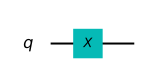

In [4]:
# |0> 量子ビットに対してゲート作用させてみましょう。
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

上記の結果を見てみましょう。 **注意** ここでは、ブロッホベクトルの代わりに量子ビットの状態ベクトルを取る `plot_bloch_multivector()`を使用しています。

Let's see the result of the above circiut. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

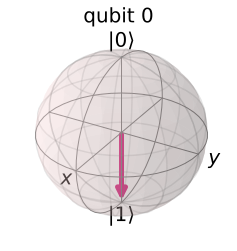

In [5]:
# 結果を見てみましょう
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

確かに、量子ビットの状態は予想どおり$|1\rangle$です。 これは、ブロッホ球の *x軸* を中心とした$\pi$ラジアンによる回転と考えることができます。 Xゲートは、古典回路との類似性からNOTゲートとも呼ばれます。

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### 1.2 Y、Zゲート  <a id="ynzgatez"></a>

Xゲートと同様に、YおよびZパウリ行列も量子回路のYおよびZゲートとして機能します。

Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = i|0\rangle\langle1| - i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

そして当然のことながら、それらはそれぞれブロッホ球のy軸とz軸を中心に$\pi$だけ回転する作用をうみます。

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

以下は、ブロッホ球で量子ビットの状態を表示するウィジェットです。いずれかのボタンを押すと、量子ビットにゲートが実行されます。

Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

In [6]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

ModuleNotFoundError: No module named 'qiskit_textbook'

Qiskitでは、次の方法でYゲートとZゲートを回路に適用できます。

In Qiskit, we can apply the Y and Z-gates to our circuit using:

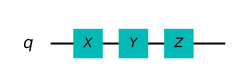

In [7]:
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw('mpl')

## 2. 余談: X、Y、Z基底 <a id="xyzbases"></a>

<details>
  <summary>備忘: 行列の固有ベクトル (ここをクリックして展開してください。)</summary>
ベクトルと行列を乗算すると、ベクトルが生成されることを確認しました。
     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{new vector}
    $$
適切なベクトルと行列を選択した場合、この行列乗算がスカラーによる乗算を実行するのと同じである場合を見つけることができます。
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$
（上記では、$M$は行列で、$\lambda$はスカラーです）。 行列$M$の場合、この性質を持つベクトルは、$M$の<i>固有ベクトル</i>と呼ばれます。 たとえば、Z行列の固有ベクトルは$|0\rangle$および$|1\rangle$の状態です。

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$
私たちは量子ビットの状態を記述するためにベクトルを使用するので、これらのベクトルをしばしば<i>固有状態</i>と呼びます。 固有ベクトルは量子計算で非常に重要であり、それらをしっかりと把握することが重要です。
</details>

また、これらの2つの状態のいずれかにある場合、Zゲートが量子ビットに影響がないように見えることもあります。 これは、状態$|0\rangle$および$|1\rangle$がZゲートの2つの _固有状態_ であるためです。 実際、_計算基底_（状態$|0\rangle$および$|1\rangle$によって形成される基底）は、Z基底と呼ばれることがよくあります。 これが私たちが使用できる唯一の基底ではありません。一般的な基底は、Xゲートの固有状態によって形成されるX基底です。 これら2つのベクトルを$|+\rangle$および$|-\rangle$と呼びます。

You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

あまり一般的ではないもう1つの基底は、Yゲートの固有状態によって形成されるものです。 これらは次のように記述されます。

Another less commonly used basis is that formed by the eigenstates of the Y-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

これらを計算する演習を用意しました。。 事実、無数の基底があります。 1つを作成するには、2つの直交ベクトルが必要です。

We leave it as an exercise to calculate these. There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors.

### 例題
1. $|+\rangle$および$|-\rangle$が実際にXゲートの固有状態であることを確認してください。
2. どのような固有値を持っていますか。
3. これらの固有値がブロッホ球に表示されないのはなぜですか？
4. Yゲートの固有状態と、ブロッホ球上の座標を見つけてください。

パウリゲートのみを使用すると、初期化された量子ビットを$|0\rangle$または$|1\rangle$以外の状態に移動することは不可能です。つまり、重ね合わせを行うことはできません。 より興味深い状態を作成するには、より多くのゲートが必要になります！

Using only the Pauli-gates it is impossible to move our initialised qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. To create more interesting states we will need more gates!

## 3. アダマールゲート  <a id="hgate"></a>

アダマールゲート（Hゲート）は以下のような行列です。

The Hadamard gate (H-gate) has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

これにより、以下の変換が実行されることがわかります。

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

この変換は、ブロッホベクトル `[1,0,1]`（x軸とz軸の間の線）を中心とする回転、またはXとZの基底間の量子ビットの状態の変換と考えることができます。

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

以下のウィジェットを使用して、これらのゲートを体感してみてください。

You can play around with these gates using the widget below:

In [8]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

ModuleNotFoundError: No module named 'qiskit_textbook'

### 例題
1. Hゲートをベクトル$|0\rangle$、$|1\rangle$、$|+\rangle$および$|-\rangle$の外積として記述してください。
2. ゲートを連ねたHZHを任意の量子ビット状態に適用することは、Xゲートを適用することと同等であることを示してください。
3. Yゲート（グローバルフェーズを無視）と同等のX、Z、Hゲートの組み合わせを見つけてください。

## 4. 余談: 異なる基底での測定  <a id="measuring"></a>

Z軸は本質的に特別なものではなく、他にも無限に多くの基底があることがわかりました。 測定と同様に、常に計算ベース（Z基底）で測定する必要はなく、任意の基底で量子ビットを測定できます。

We have seen that the Z-axis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

例として、X基底で測定してみましょう。 $|+\rangle$または$|-\rangle$を測定する確率を計算できます。

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

そして測定後、これらの2つの状態のいずれかに量子ビットがあることが保証されます。 QiskitはZ基底でのみ測定できるため、X基底で測定するにはアダマールゲートを使用して独自に作成する必要があります。

And after measurement, we are guaranteed to have a qubit in one of these two states. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

In [9]:
from qiskit.extensions import Initialize # Inititialize機能をインポートします。
# X測定関数を作成します。
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# 量子ビットを初期化して測定します。
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initialize_qubit = Initialize(initial_state)
qc.append(initialize_qubit, [0])
x_measurement(qc, 0, 0)
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
q_0: ┤ Initialize(0,1) ├┤ H ├┤M├┤ H ├
     └─────────────────┘└───┘└╥┘└───┘
c_0: ═════════════════════════╩══════

以前2つのHゲートの間にZゲートを挟むことでXゲートを作成できることを確認しました。

Before, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

ここでは、2つのHゲートの間にZ測定を挟んでX測定を作成しています。 それでは、結果を見てみましょう。

Here have created an X-measurement by sandwiching our Z-measurement between two H-gates. Let’s now see the results:

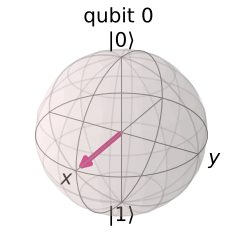

In [10]:
backend = Aer.get_backend('statevector_simulator') # Qiskitに回路のシミュレーション方法を伝えます。
out_state = execute(qc,backend).result().get_statevector() # シミュレーションを行い、状態ベクトルを返します。
plot_bloch_multivector(out_state) # 出力状態ベクトルを表示する

$|1\rangle$の状態で量子ビットを初期化しましたが、測定後、量子ビットを$|+\rangle$または$|-\rangle$の状態に折りたたんだことがわかります。 セルを再度実行すると、異なる結果が表示されますが、キュービットの最終状態は常に$|+\rangle$または$|-\rangle$になります。

We initialised our qubit in the state $|1\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the states $|+\rangle$ or $|-\rangle$. If you run the cell again, you will see different results, but the final state of the qubit will always be $|+\rangle$ or $|-\rangle$.

### 例題
1.	$|+\rangle$状態で量子ビットを初期化する場合、$|-\rangle$状態でそれを測定する確率はどれくらいですか？
2.	Qiskitを使用して、$|+\rangle$と$|-\rangle$の状態で$|0\rangle$量子ビットを測定する確率を表示してください。（**ヒント：** `.get_counts()`および `plot_histogram()`を使用することができます。)
3.	Y基底で測定する関数を作成してみてください。

さまざまな基底で測定することで、ハイゼンベルクの有名な不確実性原理を見ることができます。 Z基底で状態を測定する確実性があると、X基底で特定の状態を測定する確実性がすべて失われ、その逆も同様です。 よくある誤解は、不確実性は機器の制限によるものであるというものですが、ここでは不確かさが実際に量子ビットの性質の一部であることがわかります。

Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the  X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit. 

たとえば、量子ビットを$|0\rangle$状態にした場合、Z基底での測定は$|0\rangle$であることが確実ですが、X基底での測定は完全にランダムです！ 同様に、量子ビットを$|-\rangle$状態にした場合、X基底での測定は$|-\rangle$であることが確実ですが、Z基底での測定は完全にランダムになります。

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

より一般的には：_量子システムの状態がどのようなものであっても、特定の結果をもたらす測定が常に存在します。_

More generally: _Whatever state our quantum system is in, there is always a measurement that has a certain outcome._ 

Hゲートの導入により、いくつかの興味深い現象を探ることができましたが、量子操作にはまだ非常に制限があります。 ここで、新しいタイプのゲートを紹介しましょう。

The introduction of the H-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations. Let us now introduce a new type of gate:

## 5. R<sub>ϕ</sub>ゲート  <a id="rzgate"></a>

R<sub>ϕ</sub>ゲートは _パラメタ化されたゲート_ です。つまり、何をすべきかを正確に伝えるには数字($\phi$)が必要です。R<sub>ϕ</sub>ゲートは、Z軸を中心に$\phi$の回転を実行します（そのため、R<sub>z</sub>ゲートとも呼ばれます）。 以下のような行列です。

The R<sub>ϕ</sub>-gate is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The R<sub>ϕ</sub>-gate performs a rotation of $\phi$ around the Z-axis (and as such is sometimes also known as the R<sub>z</sub>-gate). It has the matrix:

$$
R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

$\phi$は実数です。

Where $\phi$ is a real number.

以下のウィジェットを使用してR<sub>ϕ</sub>ゲートを体感してみてください。スライダーを使用して$\phi$を指定してください。

You can use the widget below to play around with the R<sub>ϕ</sub>-gate, specify $\phi$ using the slider:

In [13]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

ModuleNotFoundError: No module named 'qiskit_textbook'

Qiskitでは、`rz(phi,qubit)`を使用してR<sub>ϕ</sub>ゲートを指定します。

In Qiskit, we specify an R<sub>ϕ</sub>-gate using `rz(phi, qubit)`:

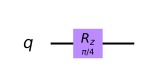

In [14]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

ZゲートはR<sub>ϕ</sub>ゲートの特殊なケースで、$\phi=\pi$であることに気付くでしょう。 実際、この章で言及する3つの一般的に参照されるゲートがあり、それらはすべてR<sub>ϕ</sub>ゲートの特殊なケースです。

You may notice that the Z-gate is a special case of the R<sub>ϕ</sub>-gate, with $\phi = \pi$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the R<sub>ϕ</sub>-gate:

## 6. I、S、Tゲート  <a id="istgates"></a>

### 6.1 Iゲート  <a id="igate"></a>

最初にIゲート（別名「Idゲート」または「Identityゲート」）があります。 これは単に何もしないゲートです。 その行列は単位行列です。

First comes the I-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

回路内の任意の場所にIゲートを適用しても、量子ビットの状態には影響がないため、これはゲートと見なすこともできます。 このゲートの存在理由は主に2つの理由があります。1つは、計算でよく使用されるためです。たとえば、Xゲートが自分自身の逆行列であることを証明します。

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

2つ目は、実際のハードウェアを検討するときに、「何もしない」または「なし」の操作を指定することがしばしば役立つためです。

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

#### 例題
1. Iゲートの固有状態は何でしょうか。

### 6.2 Sゲート <a id="sgate"></a>

次に言及するゲートはSゲート($\sqrt{Z}$ゲートとも呼ばれます）です。これは、$\phi=\pi/2$のR<sub>ϕ</sub>ゲートです。ブロッホ球の周りを1/4回転します。 この章でこれまでに紹介したすべてのゲートとは異なり、Sゲートは自分自身の逆行列では **ない** ことに注意してください。 その結果、S<sup>†</sup>ゲート（「Sダガー」、「Sdg」、または$\sqrt{Z}^\dagger$ゲートも同様）がよく表示されます。S<sup>†</sup>ゲートは$\phi=-\pi/2$のR<sub>ϕ</sub>ゲートです。

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is an R<sub>ϕ</sub>-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The the S<sup>†</sup>-gate is clearly an R<sub>ϕ</sub>-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

「$\sqrt{Z}$ゲート」という名前は、2つの連続して適用されたSゲートが1つのZゲートと同じ効果を持つという事実によるものです。

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

この表記法は、量子計算全体で共通です。

This notation is common throughout quantum computing.

QiskitでSゲートを追加するには、
To add an S-gate in Qiskit:

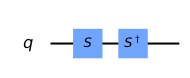

In [15]:
qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw('mpl')

### 6.3 Tゲート <a id="tgate"></a>

Tゲートは非常に一般的に使用されるゲートであり、$\phi=\pi/4$のR<sub>ϕ</sub>ゲートです。
The T-gate is a very commonly used gate, it is an R<sub>ϕ</sub>-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

Sゲートと同様に、Tゲートは$\sqrt[4]{Z}$ゲートとしても知られています。

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

Qiskitでは、

In Qiskit:

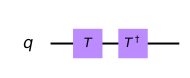

In [16]:
qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw('mpl')

以下のウィジェットを使用して、この章でこれまでに紹介したすべてのゲートを試すことができます。

You can use the widget below to play around with all the gates introduced in this chapter so far:

In [17]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo()

ModuleNotFoundError: No module named 'qiskit_textbook'

## 7. The General U<sub>3</sub>-gate  <a id="generalU3"></a>

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general R<sub>ϕ</sub>-gate. In the same way, the U<sub>3</sub>-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U_3 = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U_3(\theta,\phi,\lambda)$, but it is unusual to see this, possibly due to the difficulty in reading this.

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. That is why we have names for the S and T-gates, but not their X and Y equivalents (e.g. $\sqrt{X}$ and $\sqrt[4]{Y}$).

Qiskit also provides U<sub>2</sub> and U<sub>1</sub>-gates, which are specific cases of the U<sub>3</sub> gate in which $\theta = 0$, and $\theta = \phi = 0$ respectively. You will notice that the U<sub>1</sub>-gate is equivalent to the R<sub>ϕ</sub>-gate.

In [14]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.17.0'}